
# Práctica 1:  Reducción de la dimensionalidad

## El problema de la maldición de las dimensionalidades

Uno de los principales problemas en machine learning es el que se denomina la maldición de las dimensionalidades o de las dimensiones. Este problema surge desde el momento en el que se pretende mejorar una aproximación por el mero hecho de usar más variables. Quizá se podría pero probablemente lo más problable es que no se pueda. Es aquí donde se incurre en la mencionada maldición  ya que, **a medida que aumenta el número de características o dimensiones, la cantidad de datos que son necesarios
para obtener una generalización precisa aumenta exponencialmente.** Sin embargo antes de poder acometer el problema, es necesario saber de donde viene.

![Comportamiento del rendimiento cuando se aumenta el número de variables](./Images/Perfomance_Dimension_plot.png)


### La dimensionalidad de los problemas

Rara vez se piensa en el impacto que tendrá una determinada variable en un proceso de optimización. Tómese por ejemplo un caso en el que se dispone de 5 observaciones para una determinada variable **X**, y dichas observaciones están uniformemente distribuidas en el espacio. De esa manera cada una de las observaciones tratará de representar a $\frac{1}{5}$ del mencionado espacio.

![](./Images/Sampling_Examples.png)

Cuando se añade una vueva variable **Y** (pasando a un espacio bidimensional) con el fin de mantener la misma distancia entre ellas, es decir, la misma tasa de representatividad del espacio se debería de aumentar el número de muestras a 25. Con una tercera se necesitarían 125 muestras para explorar el espacio en las mismas condiciones, etc. 

Por lo tanto, el presente problema se acrecenta de manera exponencial cuantas más dimensiones tenemos.


### La maldición

¿Qué sucede en un problema real? Pues que habitualmente no se puede aumentar el número de muestras para mantener la representatividad de los puntos muestrales y la equidistancia. Es por ello que, si agregamos una nueva característica pero no se dota de puntos suficientes, el resultado sería un modelo más complejo pero cuyo con un rendimiento empobrecido.

El porqué de esa afirmación puede verse claramente con el siguiente ejemplo en el que se pretende clasificar entre las imagenes de gatos y perros. Si solo se tiene en cuenta una dimensión, los ejemplos se encuentran uniformemente distribuidos. 

![](./Images/Doom_1.png)

En este caso se dispone de 10 muestras que cubren todo el espacio. Pero, si se aumenta una dimensión, esa distribución pasa a ser algo como la siguiente figura.

![](./Images/Doom_2.png)

Esta situación podría hacer pensar que una nueva dimensión haría aun más fácil el dividir el espacio. Por ejemplo, añadiendo al problema anterior una tercera dimensión se obtine algo como:

![](./Images/Doom_3.png)

Dondé el resultado es linealmente separable como se puede ver en la siguiente imagen.

![](./Images/Doom_4.png)

La conclusión errónea a la que nos puede llevar es que, cuanto más se aumenta la dimensionalidad, más sencillo será la separación en base a las características. Nótese cómo ha variado la distribución de los datos: mientras que en una dimensión se tienen 2 muestras por cada intervalo de cinco muestras antes mencionado, en el espacio trimensional apenas llega a 0.08 muestras por intervalo (10/125). Por lo tanto, es más complicado que se encuentren contra ejemplos en un mismo lado del clasificador. El problema surge cuando proyectamos esos datos a un espacio dimensional inferior como pasa cuando se aplica cualquier red de neuronas artificiales al crear un clasificador. En esa situación el resultado sería similar a la siguiente figura:

![](./Images/Doom_5.png)

Como se puede ver en la siguiente figura, el clasificador sido sobreentrenado y, por lo tanto, el resultado no es tan bueno ante nuevas instancias como podría ser. Por eejmplo, véase la figura sieguiente en donde se ha aplicado un clasificador lineal sencillo sobre menos dimensiones

![](./Images/Doom_6.png)


### ¿Cómo evitar la maldición?

No existe una regla fija que defina cuántas características deben usarse en un problema de regresión / clasificación. El número dependerá de la cantidad de datos de entrenamiento disponibles, la complejidad de los límites de decisión y el tipo de clasificador utilizado. 

Existen principalmente dos tipos de aproximaciones con el fin de reducir la dimensionalidad. Esos dos tipos son:
* las proyecciones 
* las transformaciones

La diferencia entre una y la otra es que, mientras que las proyecciones operan sobre el propio espacio definido por el conjunto de muestras de entrada, las transformaciones tratan de modificar dicho espacio para encontrar una función de transición que permita una representación adecuada y separable de los datos.
Algunas de las técnicas más habituales son:

* *Principal Component Analysis (PCA)*
* *Linear Discriminant Analysis (LDA)*
* *Independent Components Analysis (ICA)*
* *Locally linear embedding (LLE)*
* *t-distributed Stochastic Neighbor Embedding (t-SNE)*
* *IsoMaps*
* *Autoencoders*



## Carga de los datos para los ejemplos
Antes de proseguir, se van a cargar un conjunto de datos que ejemplo para poder ver la influencia de las diferentes técnicas que abordaremos en este tutorial. El problema de ejemplo que se va a utilizar, es un problema clásico que lleva por título, **¿roca o mina?**. Se trata de una base de datos pequeña que consta de 111 patrones correspondientes a rocas y 97 patrones correspondientes a minas acuáticas (simuladas como cilindros metálicos). Cada uno de los patrones consta de 60 medidas numéricas entre 0.0. y 1.0. Esas medidas se corresponden con el valor de la energia de diferentes rangos de longitud de onda para un cierto periodo de tiempo.

El primer paso será la descarga del conjunto de datos si no está disponible ya. Para ello se hará uso del siguiente código con la función de utilidad que se ve a continuación.


In [1]:
from pathlib import Path
import pandas as pd

def load_data(filename, url):
    #comprobar si el fichero ya existe y si no descargarlo
    p_filename = Path(filename)
    if not p_filename.exists():
        print(f'Downloading'.ljust(75,'.'), end='', flush=True)
        import urllib.request
        urllib.request.urlretrieve(url,p_filename)
        print(f"Done!")
    return pd.read_csv(str(p_filename), delimiter=',', header=None)

file_name = 'sonar.all_data'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
data = load_data(file_name, url)

data.head(5)

Downloading................................................................Done!


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Preprocesado de los datos
Una vez descargados los datos, si bien las medidas ya están normalizadas, es necesario hacer una pequeñá adaptación en los mismo. En concreto, es necesario cambiar la interpretación de la última columna, la cual contiene la etiqueta del problema, por un entero. A mayores, también se procederá a dividir el conjunto de datos en entrenamiento y test. Dicha división mantendrá un porcentaje del 10% de patrones para el test. Un hecho a resaltar es que la división se hace de manera que se mantengan las proporciones de las diferentes clases de salida, de tal manera que se espera que el conjunto de test tenga 11 rocas y 10 minas en su composición.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

#Recoger las 60 primeras mediciones y convertirlas a un Numpy
#no tienen nombre así que accedemos según la posición
inputs = (data.iloc[:,0:60]).to_numpy()
#La última columna nos marca el tipo de patron que es
outputs = (data[60]=='M').astype('int')
print(f"Tipos de patrones: {np.unique(outputs)}")

#Crear los conjuntos de entrenamiento y test
train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(inputs, outputs, test_size=0.1, stratify=outputs)

print(f"Train Patterns{train_inputs.shape} -> {train_outputs.shape}")
print(f"Test Patterns{test_inputs.shape} -> {test_outputs.shape}")

Tipos de patrones: [0 1]
Train Patterns(187, 60) -> (187,)
Test Patterns(21, 60) -> (21,)


## Principal Component Análisis (PCA)

Probablemente la técnica de reducción de dimensionalidad más utilizada. Se puede usar tanto de manera individual como en combinación con otras técnicas. Se trata de un método que transforma los datos mediante una proyección sobre un conjunto de ejes ortogonales. Para realizar este cometido, el metodo busca las mejores combinaciones lineales de las variables originales, intentando maximizar la varianza a lo largo de la nueva variable. Por ejemplo, en la imagen de la derecha que se muestra un conjunto de puntos en tres dimensiones. Esas tres dimensiones al ser proyectadas  se obtienen las imagenes de la derecha que pemiten ver la variabilidad de los datos para cada uno de los ejes. La línea continua es la que mayor variabilidad presenta y, por tanto, la que se tomará como base o primera componente. Para la segunda componente, entre las restantes posibilidades se escogerá aquella que maximiza y sigue siendo perpendicular (ortogonal) a la primera dimensión seleccionada.

![](./Images/PCA.png)

Si se necesitase una tercera dimensión, PCA tendría que buscar una que fuera perpendicualar a estas. Este proceso se basa en la conocida como matriz *Single Value Decomposition (SVD)* que extrae los autovectores del espacio de muestras. Estos son ordenados de manera decreciente y se seleccionan los que mejor representan el espacio correspondiente.

Para aquellos que deseen entender en detalle como funciona, en el siguiente [enlace](https://sebastianraschka.com/Articles/2014_pca_step_by_step.html) pueden encontrar una descripción de como implementar PCA paso por paso.

En terminos generales si se quiere hacer uso de PCA, una buena alternativa es el uso de la implementación como la que se puede encontrar en la librería `scikit-learn`. Dicha librería cuenta con la función `PCA` que nos permite ejecutar esta técnica de reducción. Véase el siguiente ejemplo:



In [3]:
from sklearn.decomposition import PCA

#Definir PCA en función del que se desea conservar

pca = PCA(2)

#Ajustar las matrices en función de las entradas del entrenamiento
pca.fit(train_inputs)

#Una vez se tiene la transformación, simplemente es necesario aplicar la 
#transformación a los conjuntos de datos

pca_train_inputs = pca.transform(train_inputs)
pca_test_inputs = pca.transform(test_inputs)

print(f"Train Patterns{train_inputs.shape} -> {pca_train_inputs.shape}")
print(f"Test Patterns{test_inputs.shape} -> {pca_test_inputs.shape}")


Train Patterns(187, 60) -> (187, 2)
Test Patterns(21, 60) -> (21, 2)


Nótese que es importante que el ajuste de la transformación se haga sobre los datos de entrenamiento solamente. En caso de hacerlos sobre el total de los datos, se estaría contaminando con la transformación los posibles entrenamientos de técnicas de clasificación o regresión que pudieran aplicarse posteriormente.

Una de las principales ventajas de aplicar la reducción de la dimensionalidad es que permite realizar un primer estudio visual transformando un espacio multidimensional en otro de 2 o 3 dimensiones que sí se puede representar graficamente. En el ejemplo, se utilizarán los datos trasformados por PCA para la representación. En primer lugar, se define una función para facilitar la presentación los datos:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

def draw_results(x, colors,target_names=None):
    """ 
        Función de utilidad que permite imprimir un scatter plot con el fin de ver como reparten los clusters
    """
    import matplotlib.patheffects as PathEffects
    
    # Seleccionar los colores (que se corresponden con el vector de salida) en función 
    # del número de clases. Este será el vector de salida.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    if target_names is not None:
        assert num_classes == len(target_names)
        label = target_names
    else:
        label = [str(i) for i in range(num_classes)]

    # Crear el scatter plot 
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    #Coger solo las dos primeras dimensiones de cada p
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)], alpha=.8)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    #ax.axis('off')
    ax.axis('tight')

    # Añadir las etiquetas al listado de elementos graficos
    txts = []

    for i in range(num_classes):
        # Colocar las etiquetas en los valores medios medio del cluster
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, label[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

De no haber reducido la dimensionalidad el experto sería el responsable de escoger las dos variables a representar. Al hacer esto, se correría el riego de no representar correctamente la distribución.
A continuación, se imprime dos de las dimensiones que prefiera y compare los resultados con el obtenido por PCA

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(0.07714046959560308, 0.013510322268213857, '1'),
  Text(-0.1195503823376854, -0.08652579115300309, '0')])

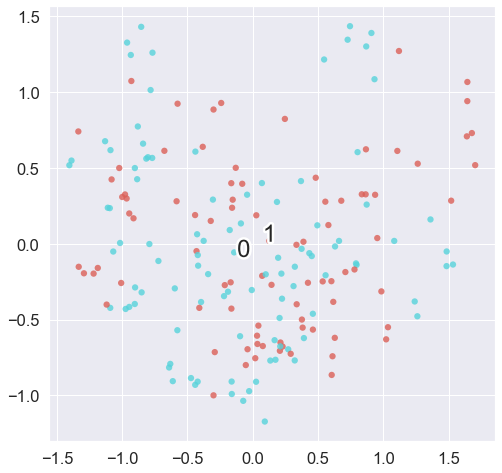

In [9]:
# Draw the PCA dataset
draw_results(pca_train_inputs, train_outputs, target_names=train_outputs.unique())

Reducir a 2 o 3 dimensiones puede ser de ayuda cuando se procura hacer un primer análisis para, por ejemplo, determinar si un clasificador lineal puede dar buenos resultados o si se observa algún patrón en la distribución de los datos. Sin embargo, lo más normal es intentar reducir la dimensionalidad pero manteniendo la mayor variabilidad posible. Para ello, la función de `scikit-learn` permite pasar un valor entre 0 y 1, que determina el porcentaje de variabilidad que debe mantener. Un valor típico es un 0.95 ya que mantiene casi toda la información relevante eliminando gran parte del ruido que pudiera haber.

In [10]:
# A continuación realice dicha reducción al 95%   
pca = PCA(0.95)
pca.fit(train_inputs)
pca_train_inputs = pca.transform(train_inputs)
pca_test_inputs = pca.transform(test_inputs)

# Compare los tamaños con los que teníamos antes
print(f"Train Patterns{train_inputs.shape} -> {pca_train_inputs.shape}")
print(f"Test Patterns{test_inputs.shape} -> {pca_test_inputs.shape}")

Train Patterns(187, 60) -> (187, 16)
Test Patterns(21, 60) -> (21, 16)


A mayores de poder representar la información, el reducir la dimensionalidad suele venmir asociado con un aceleramiento del entrenamiento. Esto se debe a que la complejidad computacional y el esfuerzo computacional de la mayoría de algoritmos de aprendizaje esta condicionado en función del número de variables. Además, también es frecuente que haya una mejoría en los modelos al eliminarse parte del ruido.

In [12]:
%%timeit
# A continuación veamos unas cuantas aproximaciones básicas y el tiempo que tardan
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB 

clfs = { 'SVM': svm.SVC(probability=True), 
         'LR': LogisticRegression(),
         'DT': DecisionTreeClassifier(max_depth=4),
         'NB':GaussianNB()}
base_models = ['SVM', 'LR','DT','NB']

for key in clfs.keys():
    clfs[key].fit(train_inputs, train_outputs)
    acc = clfs[key].score(test_inputs, test_outputs)
    print(f"{key}: {(acc*100):.4f}%")


SVM: 76.1905%
LR: 66.6667%
DT: 57.1429%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 52.3810%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 66.6667%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 66.6667%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 57.1429%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 57.1429%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 57.1429%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 66.6667%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 66.6667%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 66.6667%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 61.9048%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 66.6667%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 66.6667%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 61.9048%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 52.3810%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 57.1429%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 66.6667%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 66.6667%
NB: 57.1429%
SVM: 76.1905%
LR: 66.6667%
DT: 57.1429%
NB: 57

Compara los resultados tras haber aplicado PCA sobre los datos

In [ ]:
%%timeit
# realice el mismo entrenamiento que arriba pero con los datos de PCA
#TODO

Otro de los parámetros importantes dentro de la función `PCA` indica cómo se calcula la matriz SVD. La implementación de que se dispone en `scikit-learn` presenta diferentes alternativas, de las cuales destacan dos:
1. la primera extrae los autovectores en base a la implementación de `LAPACK` de otro paquete conocido como es `scipy`.
1. En el caso de que las dimensiones de la matriz sean pequeñas (menos de 500x500) y el número de componentes a extraer sea menor del 80%, se recomienda el uso de la implementación del algoritmo `randomized truncated SVD` presentado en los artículos \[1, 2\]

Adicionalmente, también comentar que `scikit-learn` presenta algunas de las variantes más frecuentes de PCA como son:
* [Kernel Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA), este método transforma el espacio inicial con la aplicación de un kernel en el que sea más sencillo aplicar posteriormente el PCA. A diferencia de PCA, no es una tranformación lineal.

* [Sparse Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA), implementación que, primeramente, busca un conjunto de características dispersas que permita reconstruir el conjunto original controlando el grado de difusión para, a continuación, aplicar el PCA.

* [Dimensionality reduction using truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD), versión que no centra los datos antes del calculo de SVD y que puede trabajar con matrices dispersas (_sparse_) de manera eficiente. 

* [Incremental Principal Components Analysis (IPCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html#sklearn.decomposition.IncrementalPCA) Aplicación en batches de PCA sin escalar los datos antes del calculo de SVD. Puede suponer una mejora en cuanto al uso de memoria, si bien debido al uso de batches puede no ser tan preciso en ocasiones.

\[1\]  [Halko, N., Martinsson, P. G., and Tropp, J. A. (2011). “Finding structure with randomness: Probabilistic algorithms for constructing approximate matrix decompositions”. SIAM review, 53(2), 217-288](https://doi.org/10.1137/090771806)

\[2\] [ Martinsson, P. G., Rokhlin, V., and Tygert, M. (2011). “A randomized algorithm for the decomposition of matrices”. Applied and Computational Harmonic Analysis, 30(1), 47-68](https://doi.org/10.1016/j.acha.2010.02.003)


In [13]:
# Aplique alguna de las variantes a los datos del problema y represente el resultado, ¿qué diferencias se aprecian?.
# NOTA: cuidado con la semilla aleatoria si se usa una decisión "randomized"
#TODO

##  Independent Component Analysis (ICA)

Aunque muchas veces no se la califica como una técnica de reducción de dimensionalidad, si no de extracción de las componentes principales, es probablemente la segunda técnica más popular aplicada en este sentido. El ICA es también un método de reducción lineal de la dimensión, que transforma el conjunto de datos en columnas de componentes independientes. La separación ciega de fuentes y el "problema del cóctel" son otros de sus nombres. ICA es una herramienta importante en el análisis de neuroimágenes, fMRI y EEG que ayuda a separar las señales normales de las anormales.

En el caso de este algoritmo, asume que los datos presentados son el resultado de una combinación lineal de dos entradas y que ninguna de ellas tiene una distribución gaussiana. De no darse esta condición, los resultados no serán buenos o serán inconsistentes.

Sin entrar demasiado a la parte matemática en la que se fundamenta, se debe tener en cuenta que los problemas derivados de dependencias no lineales o bien de tener una distribución gaussiana se pueden minimizar con el uso de la entropía en la formulación del algoritmo.
En terminos generales el pseudo código de ICA se puede resumir como:
```
Inicializar W
X = PCA(X)
While W changes:
      W = average(X*G(WX)) - average(g(WTX))W
      W = orthogonalize(W)
return S = WX
```

Donde $W$ es la matriz de pesos que permite hacer el cambio en los datos originales, $G$ es una matriz de Gentropía (cálculo de la difencia de entropía entre dos elementos) y $g$ es la derivada de la función anterior. La función `orthogonalize` hace referencia al proceso por el cual las columnas de una matriz se convierten en ortogonales. Por suerte una implementación mucho más rápida de este proceso puede encontrarse en `scikit-learn` con la función [FastICA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html). A continuación veremos cómo aplicarlo a los datos anteriores:


In [14]:
from sklearn.decomposition import FastICA

#Definir la función y ajustarla
ica = FastICA(n_components=2)
ica.fit(train_inputs)

# Proceder con las transformaciones

ica_train_inputs = ica.transform(train_inputs)
ica_test_inputs = ica.transform(test_inputs)

print(f"Train Patterns{train_inputs.shape} -> {ica_train_inputs.shape}")
print(f"Test Patterns{test_inputs.shape} -> {ica_test_inputs.shape}")

Train Patterns(187, 60) -> (187, 2)
Test Patterns(21, 60) -> (21, 2)


In [15]:
# Pinte los datos a continuación y observe las diferencias con PCA
#TODO

# Aplique un número distinto y compare los resultados de clasificación con las técnicas anteriores
#TODO

## Linear Discriminant Analysis (LDA)

Este algoritmo de aprendizaje automático lineal es utilizado para la clasificación multiclase, si bien en ocasiones se utiliza como un algoritmo de reducción de la dimensionalidad. Cuidado con confundirlo con el "Latent Dirichlet Allocation" (LDA), que también es una técnica de reducción de la dimensionalidad pero solo aplicable a documentos de texto.

LDA trata de separar (o discriminar) de la mejor manera posible las muestras del conjunto de datos de entrenamiento por su valor de clase. En concreto, el modelo trata de encontrar una combinación lineal de variables de entrada que consiga la máxima separación de las muestras entre clases (centroides o medias de las clases) y la mínima separación de las muestras dentro de cada clase. Por lo tanto, su mayor diferencia con PCA es que LDA tiene en cuenta la clase de salida, mientras que PCA es completamente agnóstico a este hecho.

Dentro de la librería `scikit-learn`, la implementación del algoritmo nos permite usarlo para clasificar o bien para transformar los datos correspondientes. Véase el siguiente ejemplo:


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Tenga en cuenta que el número de componentes cuando se reduce la dimensionalidad debe de ser
# n_components <= min(n_classes - 1, n_features))  
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(train_inputs, train_outputs)

lda_train_inputs = lda.transform(train_inputs)
lda_test_inputs = lda.transform(test_inputs)

print(f"Train Patterns{train_inputs.shape} -> {lda_train_inputs.shape}")
print(f"Test Patterns{test_inputs.shape} -> {lda_test_inputs.shape}")

Train Patterns(187, 60) -> (187, 1)
Test Patterns(21, 60) -> (21, 1)


Entre los parámetros más importantes de la función se pueden destacar:

* `solver{‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’` Indica qué algoritmo se utiliza para resolver la relación
 - ‘svd’: Singular value decomposition que no calcula la matriz de covarianza y, por lo tanto, es el indicado con una cantidad grande de características.

 - ‘lsqr’: Least squares solution. Método que puede usar otro de los parámetros llamado *shrinkage* o cálculos personalizados de la covarianza.

 - ‘eigen’: Eigenvalue decomposition. Pasa como con el método anterior, en este caso se calculan los autovalores de la matriz.
* `n_components`, hace referencia al número de componentes que se usarán para la reducción de la dimensionalidad cuando se aplique el método `transform`. Tenga encuenta como restricción general $n\_components <= min(n\_classes - 1, n\_features))$

* `store_covariance (default=False)` Marca si se calculará la matriz de covarianza ponderada por clase para el estimador ‘svd’. En los otros casos siempre se calcula independientemente de este parámetro

* `tol(default=1.0e-4)` Marca el límite de tolerancia para que una característica sea considerada significativa

Para más detalle, por favor revisa la documentación en la página de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [17]:
# Cargar otro problema con al menos 3 clases, reducir la dimensionalidad y representarla
#TODO

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

Es una de las técnicas NO lineales que están enfocadas a la reducción de la dimensionalidad. Habitualmente se reserva a problemas de alta dimensionalidad. Mientras que PCA es una técnica lineal que busca maximizar la varianza a la vez que  preserva las grandes distancias entre pares (en otras palabras, las cosas que son diferentes acaban estando muy separadas), t-SNE está basada en la estadística y trata de paliar defectos de otras técnicas cuando se trata de explorar datos que tienen una estructura no lineal.
![Comparativa de distribuciones](images/t-SNE.png) 

El algoritmo comienza calculando la probabilidad de similitud de los puntos en el espacio de alta dimensión (función Gaussiana) y calculando la probabilidad de similitud de los puntos en el espacio de baja dimensión (basado en una función de Cauchy). La similitud se calcula como la probabilidad condicional de que un punto $A$ elija como vecino al punto $B$ si los vecinos se eligen en proporción a su densidad de probabilidad bajo una gaussiana (distribución normal) centrada en $A$. A continuación, se minimiza la diferencia entre estas probabilidades condicionales en el espacio de mayor y menor dimensión para una representación de los puntos de datos en el espacio de menor dimensión. Para medir la minimización de la suma de la diferencia de probabilidad condicional, t-SNE minimiza la suma de la **divergencia de Kullback-Leibler** de los puntos de datos globales utilizando un método de descenso de gradiente. Esta función estadística asimétrica también utilizada en las *Generative Adversarial Networks(GAN)* o en los *Variational Auto Encoders(VAE)* permite optimización la distancia entre las distribuciones probabilísticas. 

En términos generales, t-SNE procura minimizar la divergencia entre dos distribuciones, la primera, una distribución que mide las similitudes por pares de los objetos de entrada y, la segunda, una distribución que mide las similitudes por pares de los correspondientes puntos en el espacio de baja dimensionalidad.

Un punto a destacar es que como simplificación de las distribución de Cauchy, esta se suele simplificar a un único grado de libertad lo que da como resultado una distribución de t-student, de ahí el nombre de la transformación.

El otro punto a destacar es que, después de este proceso, las características de entrada ya no son identificables, y no se puede hacer ninguna inferencia basada únicamente en el resultado de t-SNE. De ahí que sea principalmente una técnica de exploración y visualización de datos.


Para emplearlo se puede hacer uso de la correspondiente librería de `scikit-learn`.

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_train_inputs = tsne.fit_transform(train_inputs) 
tsne_test_inputs = tsne.fit_transform(test_inputs)

print(f"Train Patterns{train_inputs.shape} -> {tsne_train_inputs.shape}")
print(f"Test Patterns{test_inputs.shape} -> {tsne_test_inputs.shape}")


Train Patterns(187, 60) -> (187, 2)
Test Patterns(21, 60) -> (21, 2)


Uno de los elementos que destacan del código anterior es que, como la transformación de t-SNE no puede ser almacenada al no ser supervisada, no puede aplicarse dicha transformación posteriormente a otro conjunto. A mayores, como no tienen sentido más que gráfico y no se pueden/deben usar como entrada de un método de entrenamiento, no dispone de la llamada a la función `transform`.

Cabe destacar que, en cuanto al uso de la implementación de t-SNE, se recomienda que para su uso con espacios de alta dimensionalidad (>50) o de tipo difuso (*sparse*) se aplique, previamente, otro tipo de técnica de reducción de la dimensionalidad como , por ejemplo, PCA. Posteriormente, se aplicaría t-SNE sobre el resultado de dicha técnica de reducción de la dimensionalidad. 

Entre los parámetros más importantes que se le pueden pasar a t-SNE cabe destacar los siguientes:

* `n_components (default: 2)`: Dimensiones a las que se quiere comprimir el resultado.
* `perplexity (default: 30)`: este parámetro está relacionado con la vecindad usada por las particiones del algoritmo. Los valores habituales están en el intervalo $[5,50]$
* `early_exaggeration (default: 12.0)`: Controla como de ajustadas están las clases en el espacio de reducción y, por lo tanto, el hueco esperable entre ellas.
* `learning_rate (default: 200.0)`: como su nombre indica es el parámetro de entrenamiento que controla el aprendizaje por descenso de gradiente. En términos generales se suele usar un valor que esté en el rango $[10.0, 1000.0]$.
* `n_iter (default: 1000)`: Número máximo de iteraciones aplicadas al algoritmo de optimización. En la documentación de la librería se recomienda fijar un número igual o superior a 250.
* `method (default: ‘barnes_hut’)`: El método a ser aplicado. Por defecto se usa la aproximación de Barnes-Hut ya que esta tiene un coste computacional de $O(N log(N))$. Alternativamente, aunque más lento ya que tiene una complejidad $O(N^2)$, se puede usar el método ’exact’ que como su nombre indica no hace asunciones o aproximaciones si no que es el valor exacto.


In [19]:
# Imprimir la representación de los patrones
#TODO



## Ejercicio

Carge el problema [fashion-NMIST](https://github.com/zalandoresearch/fashion-mnist) y aplique las técnicas *PCA*, *LDA* y *t-SNE*. Analize/Represnte las diferencias en el resultado de manera gráfica. Puede usar para dicha representación la función `draw_results` definida anteriormente en este tutorial para así representar , de manera sencilla, las 10 clases de que consta este problema de clasificación.

El problema en cuestión cuenta con 70.000 imágenes de 10 tipos de ropa diferente. Cada clase está representada por 7.000 imágenes. Las clases que se contemplan, tal y como se encuentran descritas en el documento del problema, son:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Los patrones son imágenes de $28\times28$ píxeles con la imagen centrada. Estos patrones han sido divididos siguiendo un esquema _hold-out_ con 60.000 imágenes para entrenamiento y 10.000 para test. 

En este caso, sólo vamos a utilizar las imágenes de entrenamiento y, dependiendo de las capacidades del sistema, puede que sea necesario reducir el número de estas a las que se le aplicarán las técnicas de reducción para poder hacerlo en un tiempo asumible.


In [ ]:
def load_mnist(path_str, pattern_sz=(28,28), kind='train'):
    from pathlib import Path
    import gzip
    import numpy as np

    """Cargar problemas de tipo NMIST con imagenes y etiquetas"""
    path = Path(path_str)
    labels_path = path / f'{kind}-labels-idx1-ubyte.gz'
    images_path = path / f'{kind}-images-idx3-ubyte.gz'

    with gzip.open(str(labels_path.absolute()), 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
        
    with gzip.open(str(images_path.absolute()), 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), pattern_sz[0]*pattern_sz[1])
        
    return images, labels

#TODO
path_descarga = 'Ajustar segun donde se hayan descargado los ficheros'

X_train, y_train = load_mnist(path_descarga, kind='train')

#En caso de que las capacidades de la máquina sean limitadas, reducir el número de patrones de 60.000 a 20.000

#TODO en caso de necesidad

#Comprobar que se tienen las 10 clases en al submuestra seleccionada en otro caso barajar 
#y seleccionar un conjunto estratificado
#TODO

#realizar la reducción con PCA, LDA y t-SNE 
#TODO

#Pintar los resultados
#TODO